In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()


# Examples of Using PyMaxEnt
**Tony Saad and Giovanna R. Ruai** <br/>
**Department of Chemical Engineering, University of Utah**

Below are the necessary libraries used in the functions below. See examples of functions below their coded definition.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rc("font", size=11, family='serif')
plt.rc('text', usetex=True)
import numpy as np
import scipy
from scipy.special import gamma
from scipy.stats import lognorm
from src.pymaxent import *

import warnings
warnings.filterwarnings('ignore')

## Single Moment Results in a Uniform Distribution

In [3]:
from src.pymaxent import reconstruct
mu = np.array([1]) # set the moments
x = np.array([1,2,3,4,5,6]) # set all possible x-values
sol, lambdas = reconstruct(mu=mu,ivars=x)
print(sol)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


## Unbiased Die

In [4]:
from src.pymaxent import reconstruct
mu = [1,3.5] # set the moments
x = [1,2,3,4,5,6] # set all possible x-values
sol, lambdas = reconstruct(mu=mu,ivars=x)
print(sol)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


## Biased Die

In [7]:
from src.pymaxent import reconstruct
pi = np.array([1/12,1/12,1/12,2/12,3/12,4/12])
x = [1,2,3,4,5,6] # set all possible x-values
# compute μ1
μ1 = np.sum(pi*x)
print(μ1)
mu = [1,μ1] # set the moments
sol, lambdas = reconstruct(mu=mu,ivars=x)
print('μ1 for reconstructed probabilities: ', np.sum(sol*x))
print(sol)

4.416666666666666
μ1 for reconstructed probabilities:  4.416666666664867
[0.0614559  0.08595796 0.12022884 0.16816329 0.23520889 0.32898512]


## Gaussian Reconstruction

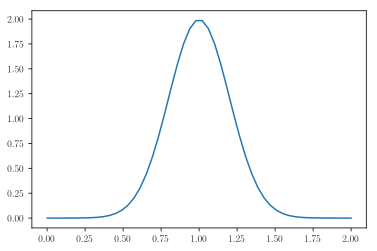

In [6]:
def gauss(x):
    σ = 0.2
    μ = 1.0
    A = 1/(σ*np.sqrt(2*np.pi))
    return A*np.exp(-(x-μ)**2/(2*σ**2))
x = np.linspace(0,2)
plt.plot(x,gauss(x))

[-11.80932161  24.99962823 -12.49981411]


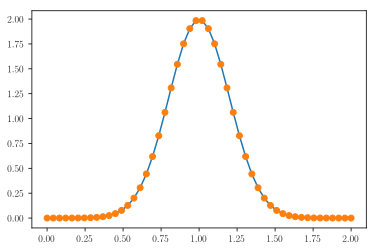

In [7]:
from src.pymaxent import reconstruct
# Use the following function to generate a set of moments to test against
mu = moments(gauss,3,bnds=[-5,5])
sol, lambdas = reconstruct(mu=mu,bnds=[0,2])
print(lambdas)
x = np.linspace(0,2)
plt.plot(x,gauss(x),x,sol(x),'o')
plt.show()

# Bimodal Gaussian Distribution

In [8]:
def gauss2(x):
    σ0 = 1.0/14.0
    μ0 = 1.0/4.0
    A0 = 1.0/(2.0*σ0*np.sqrt(2*np.pi))
    σ1 = 1.0/20.0
    μ1 = 2.0/4.0
    A1 = 1/(2*σ1*np.sqrt(2*np.pi))
    return A0*np.exp(-(x-μ0)**2/(2*σ0**2)) + A1*np.exp(-(x-μ1)**2/(2*σ1**2))

In [9]:
bnd=[0,1]
f = gauss2
xaxis= np.linspace(bnd[0], bnd[1], 200)
μin5 = moments(f,5,bnds=bnd)
μin10 = moments(f,10,bnds=bnd)
sol5,lambdas5 = reconstruct(μin5,bnds=bnd)
sol10,lambdas10 = reconstruct(μin10,bnds=bnd)

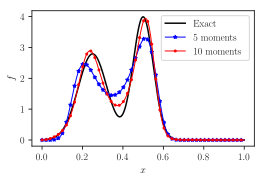

In [10]:
fig = plt.figure(figsize=(4,2.5), dpi=400)
plt.plot(xaxis,gauss2(xaxis),'k-',label='Exact')
plt.plot(xaxis,sol5(xaxis), 'b*-',linewidth=1,label='5 moments',markevery=4,markersize=4)
plt.plot(xaxis,sol10(xaxis), 'r.-',linewidth=1,label='10 moments',markevery=4,markersize=4)
# plt.title('Bimodal Gaussian Reconstruction')
plt.ylabel('$f$')
plt.xlabel('$x$')
plt.legend()
plt.show()

# Trimodal Gaussian Distribution

In [11]:
def gauss3(x):
    σ0 = 1.0/14.0
    μ0 = 1.0/4.0
    A0 = 1.0/(2.0*σ0*np.sqrt(2*np.pi))
    σ1 = 1.0/20.0
    μ1 = 2.0/4.0
    A1 = 1/(2*σ1*np.sqrt(2*np.pi))
    σ2 = 1.0/20.0
    μ2 = 3.0/4.0
    A2 = 1/(2*σ1*np.sqrt(2*np.pi))
    return A0*np.exp(-(x-μ0)**2/(2*σ0**2)) + A1*np.exp(-(x-μ1)**2/(2*σ1**2)) + A2*np.exp(-(x-μ2)**2/(2*σ2**2))

In [12]:
bnd=[0,1]
f = gauss3
xaxis= np.linspace(bnd[0], bnd[1], 200)
μin5 = moments(f,5,bnds=bnd)
μin13 = moments(f,13,bnds=bnd)
sol5,lambdas5 = reconstruct(μin5,bnds=bnd)
sol13,lambdas13 = reconstruct(μin13,bnds=bnd)

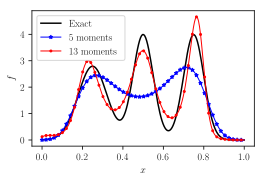

In [13]:
fig = plt.figure(figsize=(4,2.5), dpi=400)
plt.plot(xaxis,f(xaxis),'k-',label='Exact')
plt.plot(xaxis,sol5(xaxis), 'b*-',linewidth=1,label='5 moments',markevery=4,markersize=4)
plt.plot(xaxis,sol13(xaxis), 'r.-',linewidth=1,label='13 moments',markevery=4,markersize=4)
# plt.title('Bimodal Gaussian Reconstruction')
plt.ylabel('$f$')
plt.xlabel('$x$')
plt.legend()
plt.show()

# Beta Distribution

In [14]:
def beta(x):
    β = 9
    α = 3
    B = lambda X: X**(α-1)*(1-X)**(β-1)
    btm = quad(B,0,1)[0]
    return x**(α-1)*(1-x)**(β-1)/btm

In [15]:
bnd=[0,1]
f = beta
xaxis= np.linspace(bnd[0], bnd[1], 200)
μin3 = moments(f,3,bnds=bnd)
μin5 = moments(f,5,bnds=bnd)
sol3,lambdas3 = reconstruct(μin3,bnds=bnd)
sol5,lambdas5 = reconstruct(μin5,bnds=bnd)

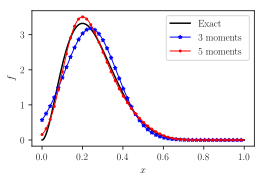

In [16]:
fig = plt.figure(figsize=(4,2.5), dpi=400)
plt.plot(xaxis,f(xaxis),'k-',label='Exact')
plt.plot(xaxis,sol3(xaxis), 'b*-',linewidth=1,label='3 moments',markevery=4,markersize=4)
plt.plot(xaxis,sol5(xaxis), 'r.-',linewidth=1,label='5 moments',markevery=4,markersize=4)
# plt.title('Bimodal Gaussian Reconstruction')
plt.ylabel('$f$')
plt.xlabel('$x$')
plt.legend()
plt.show()

# Beta Distribution 2

In [17]:
def beta2(x):
    α = β = 0.5
    B = lambda X: X**(α-1)*(1-X)**(β-1)
    btm = quad(B,0,1)[0]
    return x**(α-1)*(1-x)**(β-1)/btm

In [18]:
bnd=[0,1]
f = beta2
xaxis= np.linspace(bnd[0], bnd[1], 200)
μin3 = moments(f,3,bnds=bnd)
μin5 = moments(f,5,bnds=bnd)
sol3,lambdas3 = reconstruct(μin3,bnds=bnd)
sol5,lambdas5 = reconstruct(μin5,bnds=bnd)

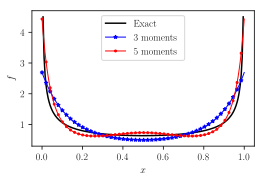

In [19]:
fig = plt.figure(figsize=(4,2.5), dpi=400)
plt.plot(xaxis,f(xaxis),'k-',label='Exact')
plt.plot(xaxis,sol3(xaxis), 'b*-',linewidth=1,label='3 moments',markevery=4,markersize=4)
plt.plot(xaxis,sol5(xaxis), 'r.-',linewidth=1,label='5 moments',markevery=4,markersize=4)
# plt.title('Bimodal Gaussian Reconstruction')
plt.ylabel('$f$')
plt.xlabel('$x$')
plt.legend()
# plt.tight_layout()
plt.show()

# LogNormal Distribution

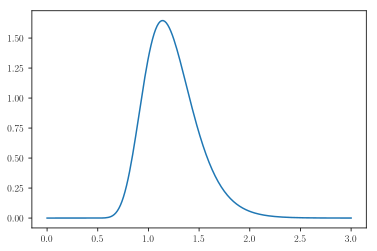

In [20]:
x = np.linspace(0,3,200)
stddev = 1/4
mean = 0.2
dist=lognorm([stddev],loc=mean)
plt.plot(x,dist.pdf(x))

In [21]:
bnd=[0,5]
f = dist.pdf
xaxis= np.linspace(bnd[0], bnd[1], 200)
μin3 = moments(f,3,bnds=bnd)
μin5 = moments(f,5,bnds=bnd)
sol3,lambdas3 = reconstruct(μin3,bnds=bnd)
sol5,lambdas5 = reconstruct(μin5,bnds=bnd)

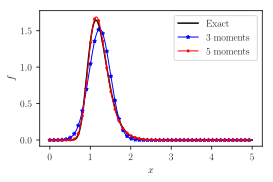

In [22]:
fig = plt.figure(figsize=(4,2.5), dpi=400)
plt.plot(xaxis,f(xaxis),'k-',label='Exact')
plt.plot(xaxis,sol3(xaxis), 'b*-',linewidth=1,label='3 moments',markevery=4,markersize=4)
plt.plot(xaxis,sol5(xaxis), 'r.-',linewidth=1,label='5 moments',markevery=4,markersize=4)
# plt.title('Bimodal Gaussian Reconstruction')
plt.ylabel('$f$')
plt.xlabel('$x$')
plt.legend()
plt.show()